# Abstract

Twitter has become an important communication channel in emergency situations. The ubiquity of smartphones enables people to announce emergencies they are observing in real time.

The goal of this project is to build a machine learning model that can predict which tweets are about real disasters and which are not.

# Data Input

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df_train[df_train['target'] == 1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [12]:
df_train[df_train['target'] == 0]['text'].iloc[20]

'Ablaze for you Lord :D'

In [4]:
df_train[df_train['target'] == 0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# Data Analysis

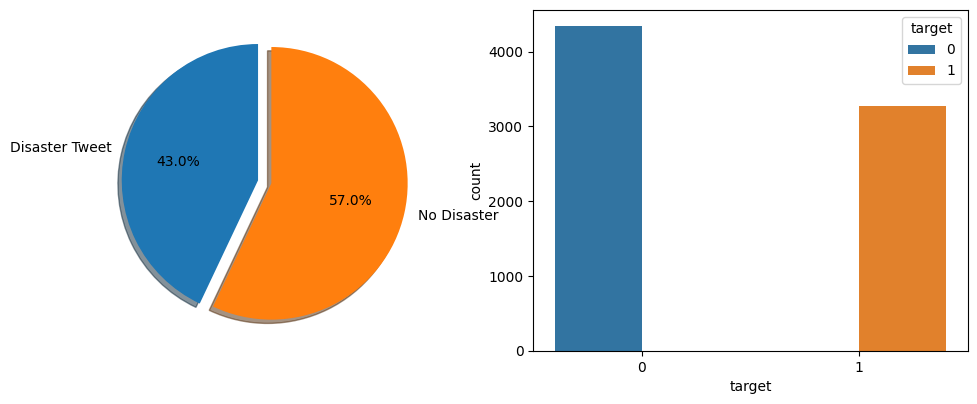

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=100)
plt.tight_layout()

labels=['Disaster Tweet','No Disaster']
size=  [df_train['target'].mean()*100,abs(1-df_train['target'].mean())*100]
explode = (0, 0.1)
#ig1,ax1 = plt.subplots()
axes[0].pie(size,labels=labels,explode=explode,shadow=True,
            startangle=90,autopct='%1.1f%%')
sns.countplot(x=df_train['target'], hue=df_train['target'], ax=axes[1])
# plt.show()
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

In [15]:
from nltk.corpus import stopwords
import re

def get_words_counts(tweets):
    length = len(str(tweets).split())
    return length
    
def get_chars_counts(tweets):
    string = tweets.split()
    x = ''.join(string)
    return len(x)
    
def get_average_word_length(tweets):
    count = get_chars_counts(tweets)/get_words_counts(tweets)
    return count

def get_stopwords_count(tweets):
    stopwords = len([t for t in tweets.split() if t in stopwords])
    return stopwords
    
def get_hashtags_tags(tweets):
    hashtags = len([t for t in tweets.split() if t.startswith('#')])
    return hashtags
        
def get_email_tags(tweets):
    email = len([t for t in tweets.split() if t.startwith('@')])
    return email
    
def get_digit_counts(tweets):
    digits = re.findall(r'[0-9,.]+', tweets)
    return digits
    
def get_uppercase_units(tweets):
    uppercase = len([t for t in tweets.split() if t.isupper()])
    return uppercase

In [16]:
df_train['words_counts'] = df_train['text'].apply(lambda x: get_words_counts(x))
df_train['char_counts'] = df_train['text'].apply(lambda x: get_chars_counts(x))
df_train['average_word_length'] = df_train['text'].apply(lambda x: get_average_word_length(x))
df_train['hashtags_counts'] = df_train['text'].apply(lambda x: get_hashtags_tags(x))
df_train['digits_counts'] = df_train['text'].apply(lambda x: get_digit_counts(x))
df_train['uppercase_counts'] = df_train['text'].apply(lambda x: get_uppercase_units(x))

/home/lyz/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


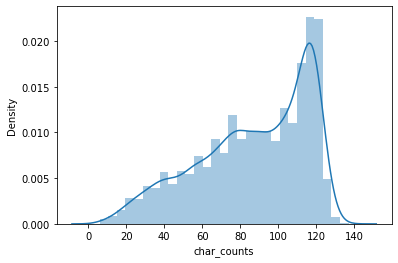

In [18]:
sns.distplot(df_train['char_counts'])
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

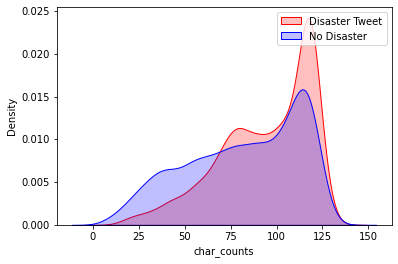

In [19]:
sns.kdeplot(df_train[df_train['target'] == 1]['char_counts'], shade=True, color='red')
sns.kdeplot(df_train[df_train['target'] == 0]['char_counts'], shade=True, color= 'blue')
plt.legend(['Disaster Tweet','No Disaster'])
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

<AxesSubplot:xlabel='average_word_length', ylabel='Density'>

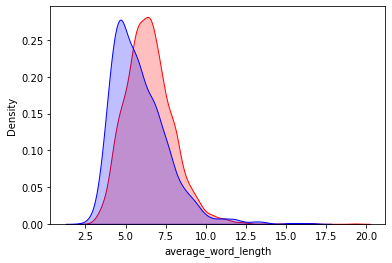

In [62]:
sns.kdeplot(df_train[df_train['target'] == 1]['average_word_length'], shade=True, color='red')
sns.kdeplot(df_train[df_train['target'] == 0]['average_word_length'], shade=True, color= 'blue')

In [20]:
def clean_text(text):
    import re
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"you'll", "you will", text)
    text = re.sub(r"i'll", "i will", text)
    text = re.sub(r"she'll", "she will", text)
    text = re.sub(r"he'll", "he will", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"there's", "there is", text)
    text = re.sub(r"here's", "here is", text)
    text = re.sub(r"who's", "who is", text)
    text = re.sub(r"how's", "how is", text)
    return text

from gensim.parsing.preprocessing import remove_stopwords

df_train['clean_text'] = df_train['text'].apply(remove_stopwords)
df_train['clean_text'] = df_train['clean_text'].apply(clean_text)

In [54]:
def get_word_freqs(df, col):
    text = ' '.join(df[col])
    text = text.split()
    text = [x for x in text if len(x) >= 4 
            and ' ' not in x 
            and 'htt' not in x 
            and '&' not in x 
            and 'û' not in x
           and 'Û' not in x]
    freq = pd.Series(text).value_counts()
    return freq

real_data = get_word_freqs(df_train[df_train['target']==1], 'clean_text')
real_data = ' '.join(real_data.index)

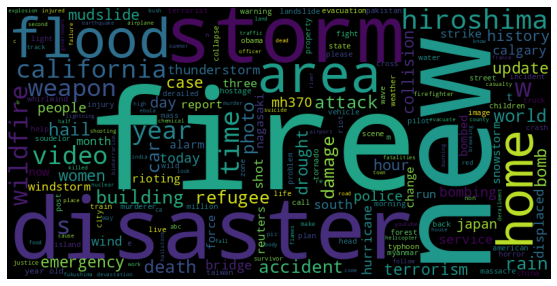

In [55]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(real_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

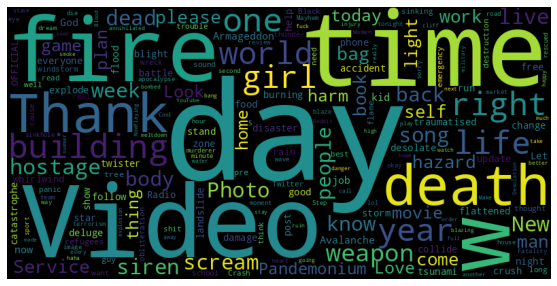

In [53]:
real_data = get_word_freqs(df_train[df_train['target']==0], 'text')
real_data = ' '.join(real_data.index)

wordcloud = WordCloud(width=800, height=400).generate(real_data)
plt.figure(figsize=(10, 5))

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

# Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

## Load Word2Vec

In [57]:
import gensim.downloader as api
word2vec = KeyedVectors.load_word2vec_format(
    '/Users/darin/Desktop/GoogleNews-vectors-negative300.bin', binary=True)

In [60]:
from nltk.tokenize import word_tokenize

def encode_word2vec(x):
    words = word_tokenize(x.lower())
    feat = []
    for word in words:
        if word in word2vec:
            feat.append(word2vec[word])
    
    if len(feat) == 0:
        return np.zeros(300)
    
    return np.array(feat).mean(0)

## Model with Raw data 

In [87]:
X_train,X_test,y_train,y_test = train_test_split(df_train['text'],df_train['target'])
vector = TfidfVectorizer().fit(X_train)

X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
print('Logistic Regression with TFIDF \nROC Auc Score %3f'%(roc_auc_score(y_test,model.predict(X_test_vector))))

Logistic Regression with TFIDF 
ROC Auc Score 0.801061


In [98]:
for r in [(1,1), (1,2), (1,3), (1,4)]:
    for m in [1000, 2000, 3000, 4000]:
        acc = []
        for _ in range(5):
            X_train,X_test,y_train,y_test = train_test_split(df_train['text'],df_train['target'])
            vector = TfidfVectorizer(max_features=m, ngram_range=r).fit(X_train)

            X_train_vector = vector.transform(X_train)
            X_test_vector = vector.transform(X_test)

            model = LogisticRegression().fit(X_train_vector,y_train)
            acc.append(roc_auc_score(y_test, model.predict(X_test_vector)))
        
        print(m, r, np.mean(acc))

1000 (1, 1) 0.7794280393584948
2000 (1, 1) 0.7914296613404161
3000 (1, 1) 0.7904144392726822
4000 (1, 1) 0.7911397329281412
1000 (1, 2) 0.7801667505529627
2000 (1, 2) 0.7855319080574473
3000 (1, 2) 0.7820239140433435
4000 (1, 2) 0.7828600079912347
1000 (1, 3) 0.7743621512882521
2000 (1, 3) 0.7809615898429505
3000 (1, 3) 0.7779708763264976
4000 (1, 3) 0.7820531395659442
1000 (1, 4) 0.7783350225061273
2000 (1, 4) 0.7706536953758156
3000 (1, 4) 0.7829469803476883
4000 (1, 4) 0.7865748362790542


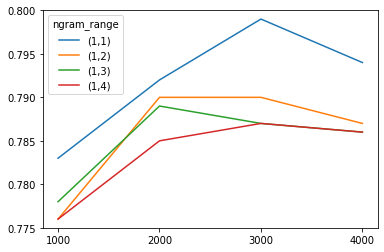

In [84]:
plt.plot([1000, 2000, 3000, 4000], [0.783, 0.792, 0.799, 0.794])
plt.plot([1000, 2000, 3000, 4000], [0.776, 0.790, 0.790, 0.787])
plt.plot([1000, 2000, 3000, 4000], [0.778, 0.789, 0.787, 0.786])
plt.plot([1000, 2000, 3000, 4000], [0.776, 0.785, 0.787, 0.786])

plt.legend(['(1,1)', '(1,2)', '(1,3)', '(1,4)'], title='ngram_range')
plt.xticks([1000, 2000, 3000, 4000])
plt.ylim(0.775, 0.80)

plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

In [77]:
cv_vector = CountVectorizer().fit(X_train)
X_train_vector = cv_vector.transform(X_train)
X_test_vector = cv_vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
predict = model.predict(X_test_vector)
score = roc_auc_score(y_test,predict)
print('Logistic Regression with CountVector \nROC Auc Score %3f'%(roc_auc_score(y_test,model.predict(X_test_vector))))

Logistic Regression with CountVector 
ROC Auc Score 0.787182


/home/lyz/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

for r in [(1,1), (1,2), (1,3), (1,4)]:
    for m in [1000, 2000, 3000, 4000]:
        acc = []
        for _ in range(5):
            vector = CountVectorizer(max_features=m, ngram_range=r).fit(X_train)

            X_train_vector = vector.transform(X_train)
            X_test_vector = vector.transform(X_test)

            model = LogisticRegression().fit(X_train_vector,y_train)
            acc.append(roc_auc_score(y_test, model.predict(X_test_vector)))
        
        print(m, r, np.mean(acc))

1000 (1, 1) 0.7760437508336668
2000 (1, 1) 0.7883153261304523
3000 (1, 1) 0.7877817793784181
4000 (1, 1) 0.7884487128184607
1000 (1, 2) 0.7821795384820595
2000 (1, 2) 0.7832466319861277
3000 (1, 2) 0.7867813792183539
4000 (1, 2) 0.7831132452981193
1000 (1, 3) 0.784780578898226
2000 (1, 3) 0.7769107643057223
3000 (1, 3) 0.7871148459383753
4000 (1, 3) 0.7844471121782046
1000 (1, 4) 0.7835134053621449
2000 (1, 4) 0.7817126850740297
3000 (1, 4) 0.7874483126583965
4000 (1, 4) 0.7872482326263838


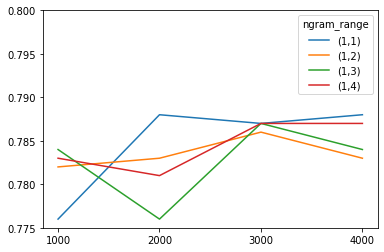

In [85]:
plt.plot([1000, 2000, 3000, 4000], [0.776, 0.788, 0.787, 0.788])
plt.plot([1000, 2000, 3000, 4000], [0.782, 0.783, 0.786, 0.783])
plt.plot([1000, 2000, 3000, 4000], [0.784, 0.776, 0.787, 0.784])
plt.plot([1000, 2000, 3000, 4000], [0.783, 0.781, 0.787, 0.787])

plt.legend(['(1,1)', '(1,2)', '(1,3)', '(1,4)'], title='ngram_range')
plt.xticks([1000, 2000, 3000, 4000])
plt.ylim(0.775, 0.80)
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

In [86]:
X_train_word2vec = [encode_word2vec(x) for x in X_train]
X_test_word2vec = [encode_word2vec(x) for x in X_test]

X_train_word2vec = np.array(X_train_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

model = LogisticRegression().fit(X_train_word2vec,y_train)
predict = model.predict(X_test_word2vec)
score = roc_auc_score(y_test,predict)
print('Logistic Regression with Word2Vec \nROC Auc Score %3f'%(score))

Logistic Regression with Word2Vec 
ROC Auc Score 0.781513


## Model with Clean data 

In [88]:
df_train.iloc[0:10][['text','clean_text']]

,text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds reason #earthquake may allah forgive
1,Forest fire near La Ronge Sask. Canada,forest near la ronge sask. canada
2,All residents asked to 'shelter in place' are ...,all residents asked 'shelter place' notified o...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,just got sent photo ruby #alaska smoke #wildfi...
5,#RockyFire Update => California Hwy. 20 closed...,#rockyfire update => california hwy. 20 closed...
6,#flood #disaster Heavy rain causes flash flood...,#flood #disaster heavy rain causes flash flood...
7,I'm on top of the hill and I can see a fire in...,i am hill i woods...
8,There's an emergency evacuation happening now ...,there is emergency evacuation happening buildi...
9,I'm afraid that the tornado is coming to our a...,i am afraid tornado coming area...


In [89]:
X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
vector = TfidfVectorizer().fit(X_train)

X_train_vector = vector.transform(X_train)
X_test_vector = vector.transform(X_test)

model = LogisticRegression().fit(X_train_vector,y_train)
print('Logistic Regression with TFIDF \nROC Auc Score %3f'%(roc_auc_score(y_test,model.predict(X_test_vector))))

Logistic Regression with TFIDF 
ROC Auc Score 0.765524


In [96]:
for r in [(1,1), (1,2), (1,3), (1,4)]:
    for m in [1000, 2000, 3000, 4000]:
        acc = []
        for _ in range(5):
            X_train,X_test,y_train,y_test = train_test_split(df_train['clean_text'],df_train['target'])
            vector = TfidfVectorizer(max_features=m, ngram_range=r).fit(X_train)

            X_train_vector = vector.transform(X_train)
            X_test_vector = vector.transform(X_test)

            model = LogisticRegression().fit(X_train_vector,y_train)
            acc.append(roc_auc_score(y_test, model.predict(X_test_vector)))
        
        print(m, r, np.mean(acc))

1000 (1, 1) 0.777450383153518
2000 (1, 1) 0.7860521203950862
3000 (1, 1) 0.7893163274157249
4000 (1, 1) 0.7851297725364459
1000 (1, 2) 0.7671771307535703
2000 (1, 2) 0.781061523743326
3000 (1, 2) 0.7861457498088089
4000 (1, 2) 0.7835643054245075
1000 (1, 3) 0.7665845641530913
2000 (1, 3) 0.7772031421578545
3000 (1, 3) 0.7875223691462762
4000 (1, 3) 0.77981180783529
1000 (1, 4) 0.7692000580866398
2000 (1, 4) 0.7805386317807887
3000 (1, 4) 0.7848234274945822
4000 (1, 4) 0.7858950548174987


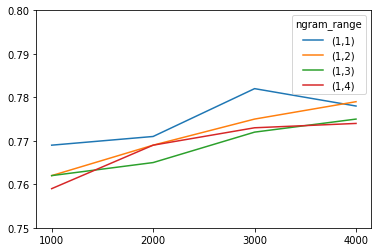

In [95]:
plt.plot([1000, 2000, 3000, 4000], [0.769, 0.771, 0.782, 0.778])
plt.plot([1000, 2000, 3000, 4000], [0.762, 0.769, 0.775, 0.779])
plt.plot([1000, 2000, 3000, 4000], [0.762, 0.765, 0.772, 0.775])
plt.plot([1000, 2000, 3000, 4000], [0.759, 0.769, 0.773, 0.774])

plt.legend(['(1,1)', '(1,2)', '(1,3)', '(1,4)'], title='ngram_range')
plt.xticks([1000, 2000, 3000, 4000])
plt.ylim(0.75, 0.80)
plt.savefig('tmp.png', dpi=200, bbox_inches='tight')

In [92]:
X_train_word2vec = [encode_word2vec(x) for x in X_train]
X_test_word2vec = [encode_word2vec(x) for x in X_test]

X_train_word2vec = np.array(X_train_word2vec)
X_test_word2vec = np.array(X_test_word2vec)

model = LogisticRegression().fit(X_train_word2vec,y_train)
predict = model.predict(X_test_word2vec)
score = roc_auc_score(y_test,predict)
print('Logistic Regression with Word2Vec \nROC Auc Score %3f'%(score))

Logistic Regression with Word2Vec 
ROC Auc Score 0.778723


In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

vec = CountVectorizer()
clf = LogisticRegressionCV()
pipe = make_pipeline(vec, clf)
pipe.fit(df_train['text'],df_train['target']);

In [112]:
eli5.show_weights(clf, vec=vec, top=10, target_names=['Not Disaster', 'Real Disaster', ])

In [124]:
eli5.show_prediction(clf, df_train['text'].iloc[100], vec=vec,
                     target_names=['Not Disaster', 'Real Disaster', ])

/home/lyz/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [116]:
eli5.show_prediction(clf, df_train['text'].iloc[2], vec=vec,
                     target_names=['Not Disaster', 'Real Disaster', ])

/home/lyz/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
